## Exploratory Data Analysis ##

In [1]:
#import necessary programs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
plt.style.use('seaborn')

In [2]:
#review preprocessed dataframe
df = pd.read_csv('./data/preprocessing.csv')
df.head()
df.columns

Index(['Unnamed: 0', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15',
       'year_sold', 'month_sold', 'year_built', 'year_renovated',
       'Geo_Clusters'],
      dtype='object')

In [3]:
#drop unnamed index added when saving 
df=df.drop(['Unnamed: 0'], axis=1)

In [4]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15,year_sold,month_sold,year_built,year_renovated,Geo_Clusters
0,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,0.0,1340,5650,2014,10,5.0,12,4
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1690,7639,2014,12,5.0,9,2
2,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,2720,8062,2015,2,3.0,12,2
3,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1360,5000,2014,12,6.0,12,4
4,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1800,7503,2015,2,8.0,12,0


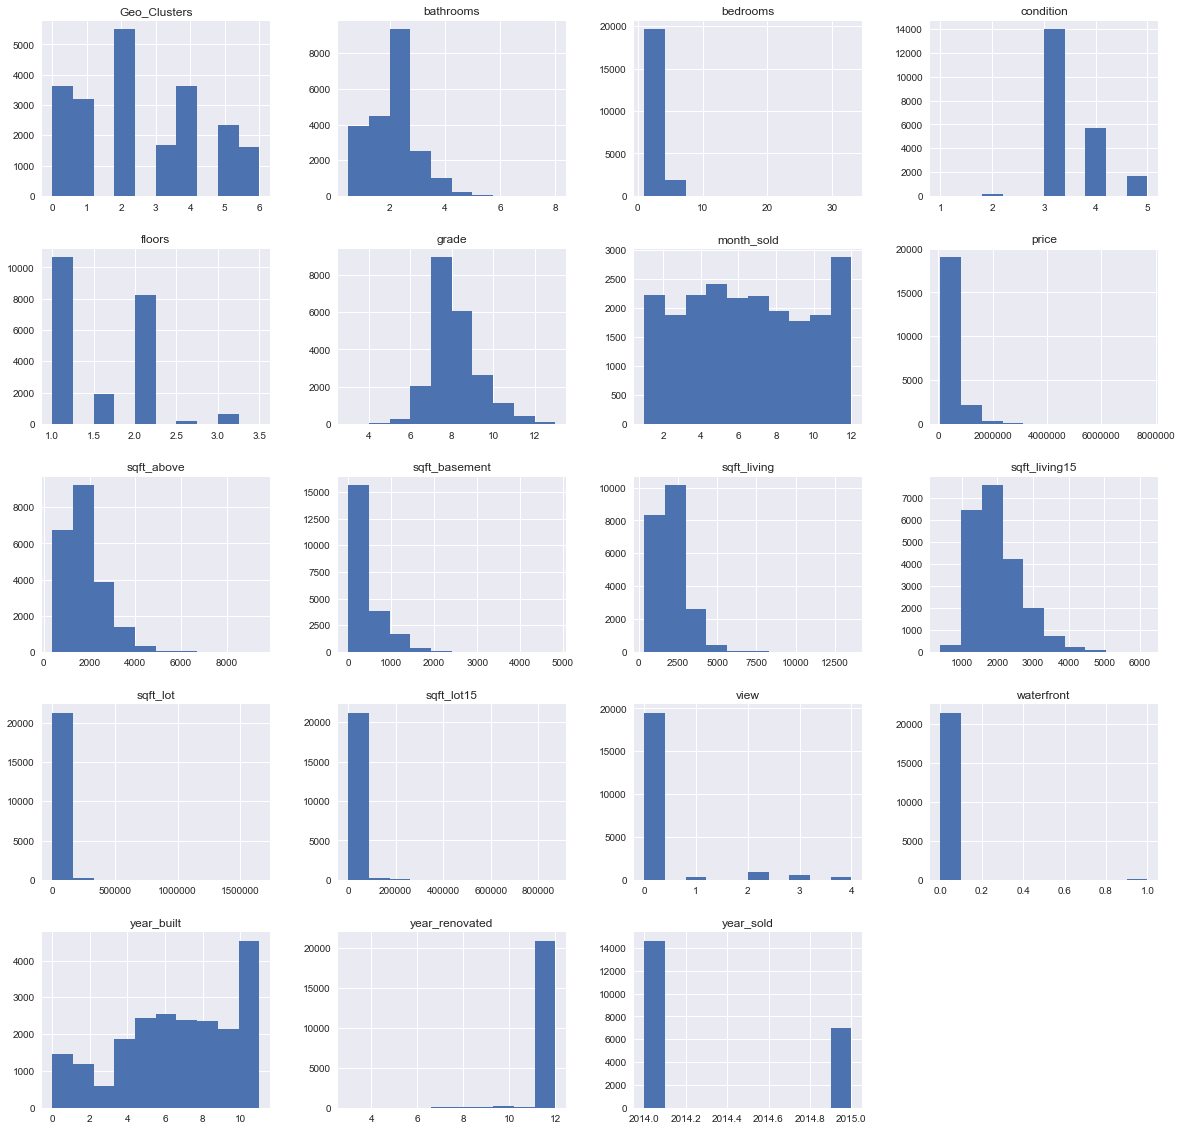

In [5]:
df.hist(figsize=[20,20]);

In [6]:
#There are several graphs that look promising despite skewness

#### Feature Selection of Continuous Data ####

In [7]:
#Let's address the skewness and look for lienarity 
#I'll start with sqft_living, hoping this filter will improve the other graphs

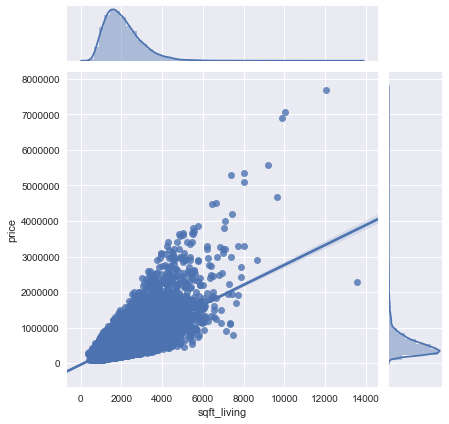

In [8]:
sns.jointplot('sqft_living','price', data=df, kind='reg');

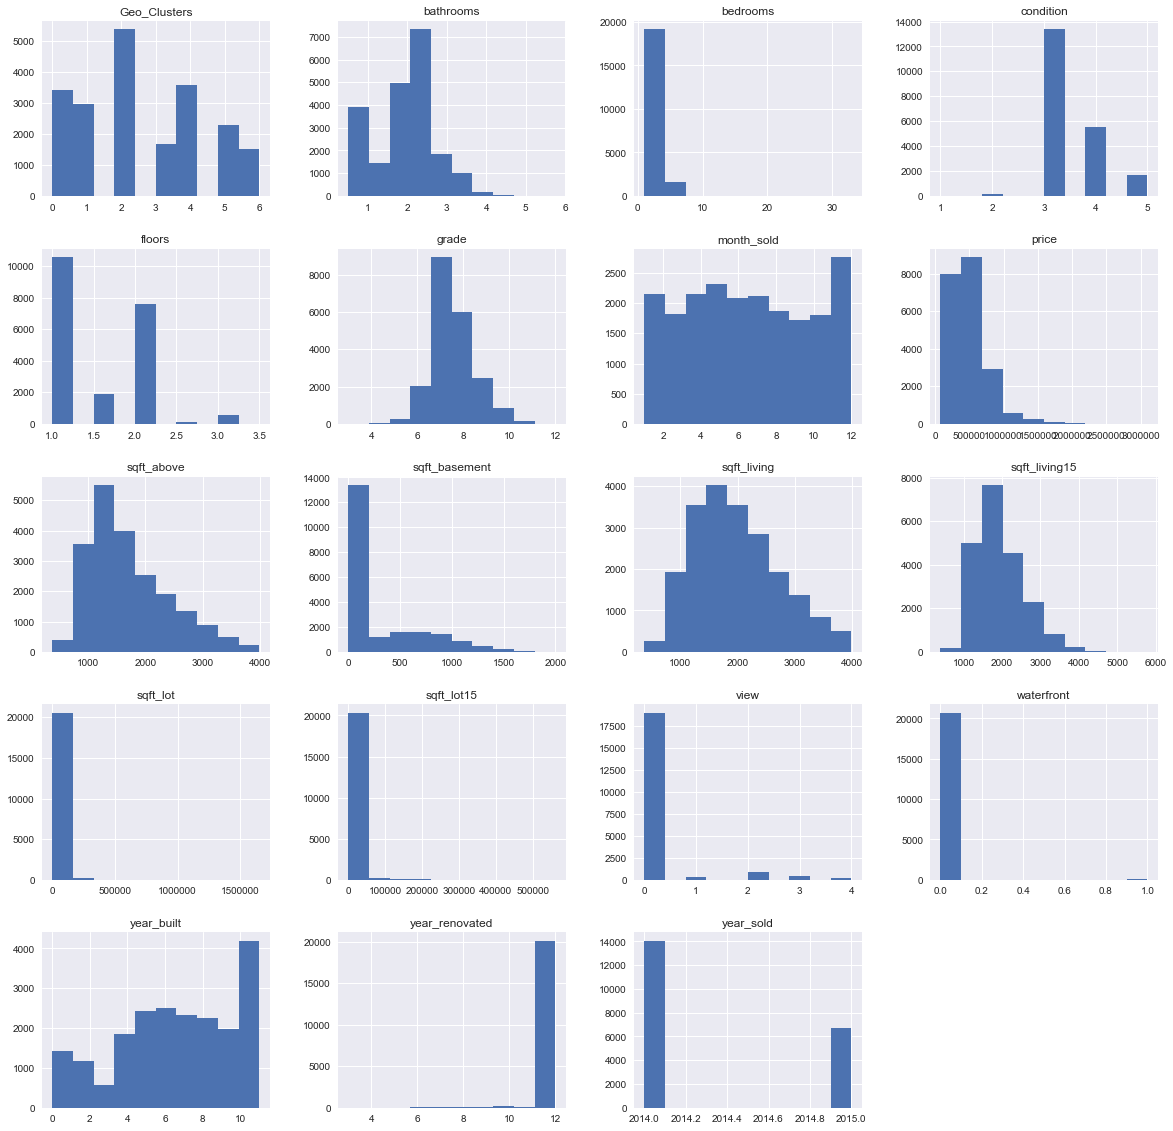

In [9]:
#let's cut it off at 4,000 sqft
df_filtered = df[df['sqft_living']<4000]
df_filtered.hist(figsize=[20,20]);

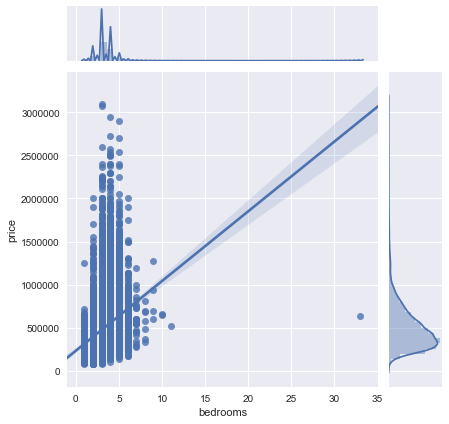

In [10]:
#that's better, but some could still improve. 
sns.jointplot('bedrooms','price', data=df_filtered, kind='reg');

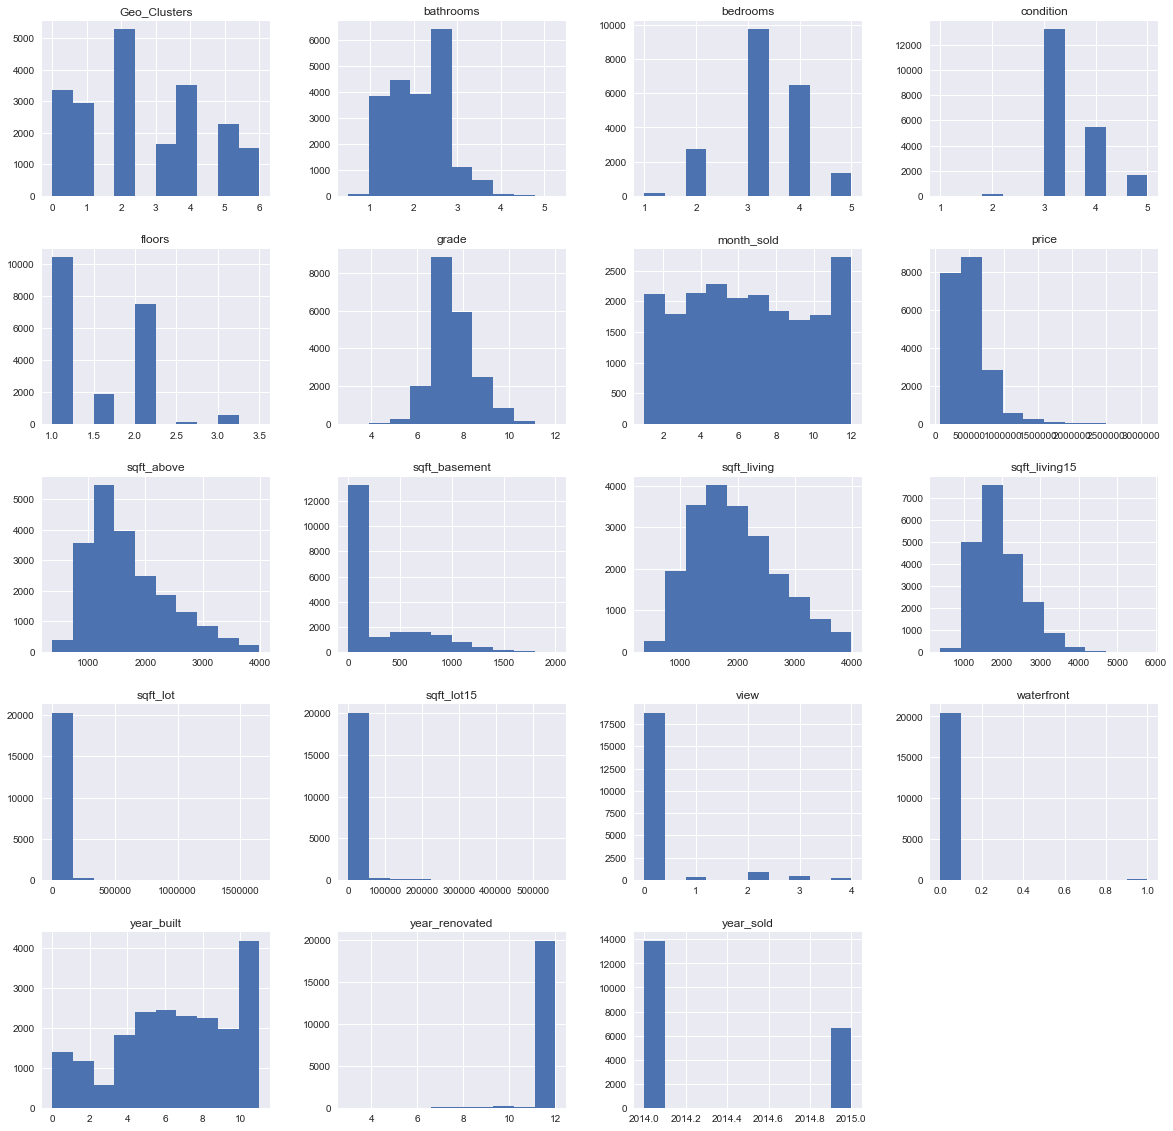

In [11]:
#let's cut this off at 6
df_filtered = df[(df['sqft_living']<4000) & (df['bedrooms']<6)]
df_filtered.hist(figsize=[20,20]);

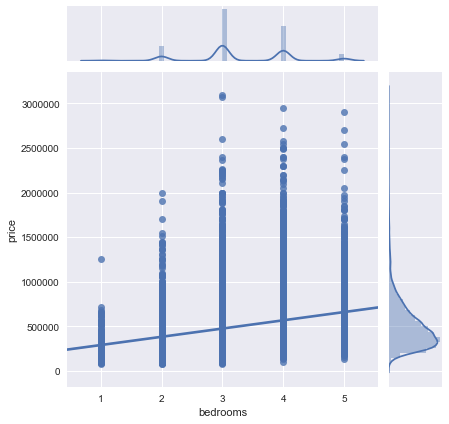

In [12]:
#better, let's look at one last feature 
sns.jointplot('bedrooms','price', data=df_filtered, kind='reg');

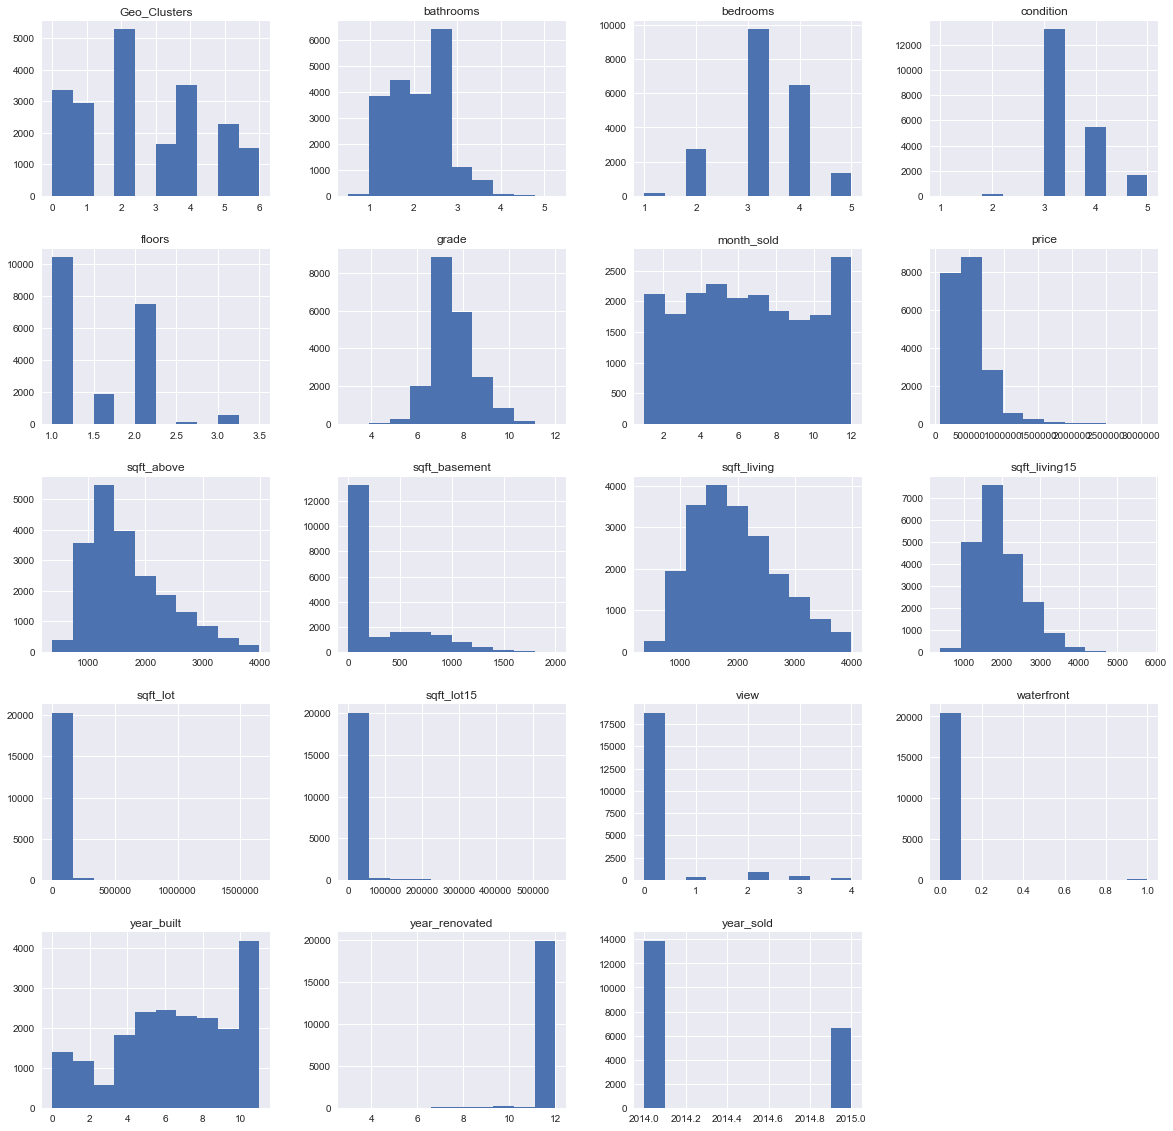

In [13]:
#let's cut it off at 6 bathrooms
df_filtered = df[(df['sqft_living']<4000) & (df['bedrooms']<6) & (df['bathrooms']<6)]
df_filtered.hist(figsize=[20,20]);

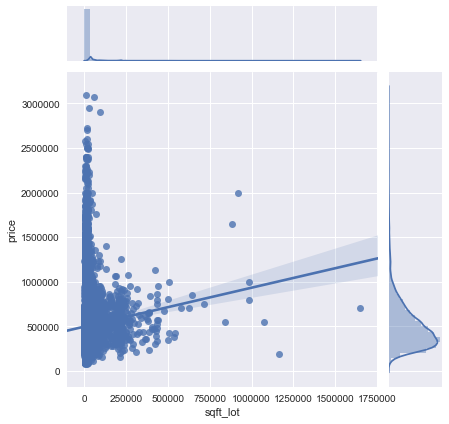

In [14]:
#Let's keep going. 
sns.jointplot('sqft_lot','price', data=df_filtered, kind='reg');

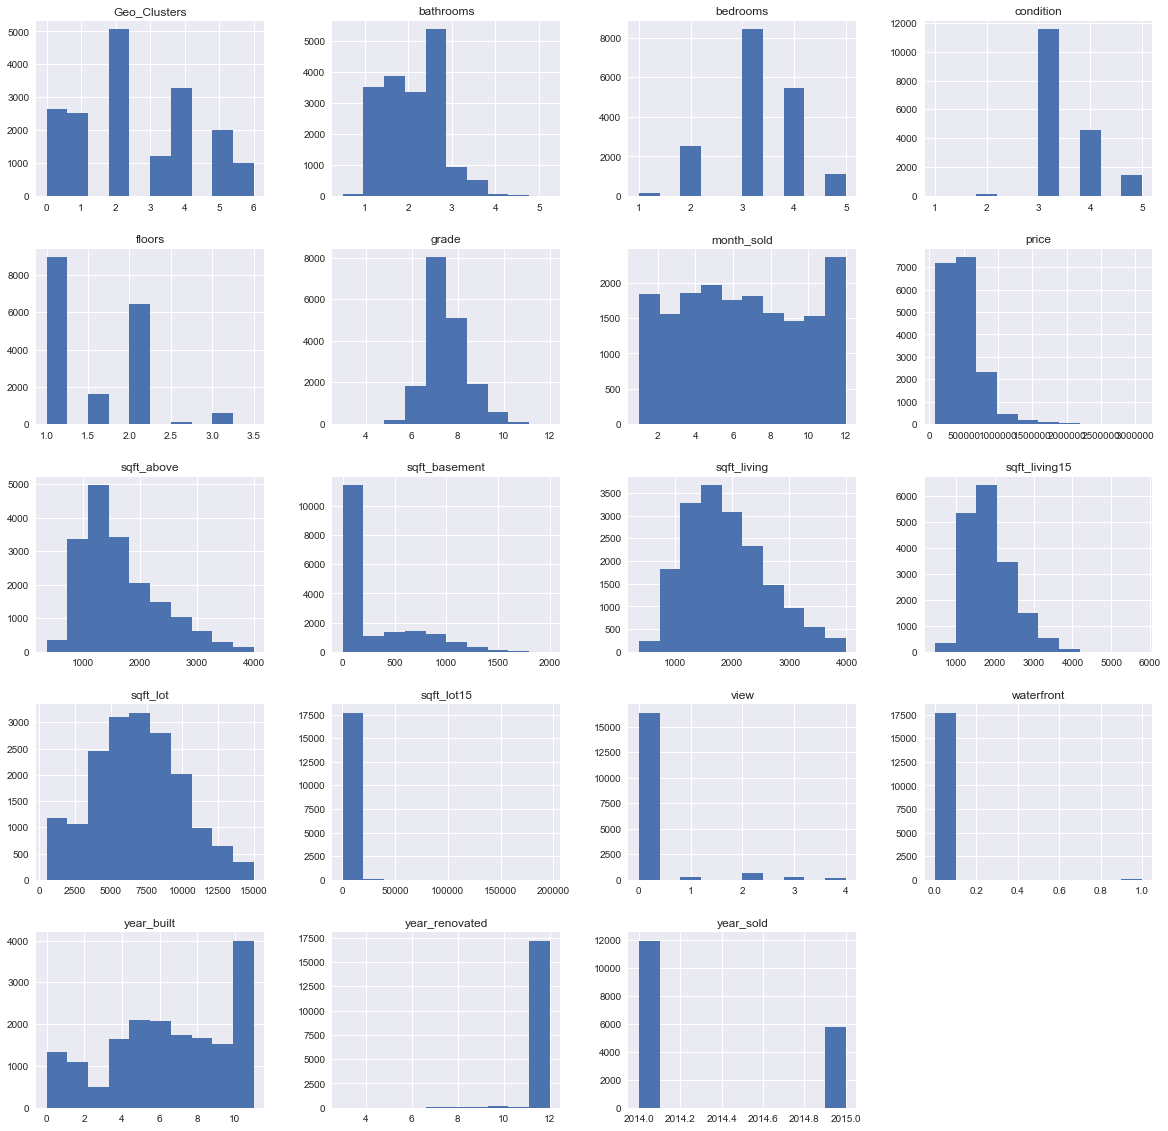

In [15]:
#let's cut it off at 15,000
df_filtered = df[(df['sqft_living']<4000) & (df['bedrooms']<6) & (df['bathrooms']<6) & (df['sqft_lot'] <15000)]
df_filtered.hist(figsize=[20,20]);

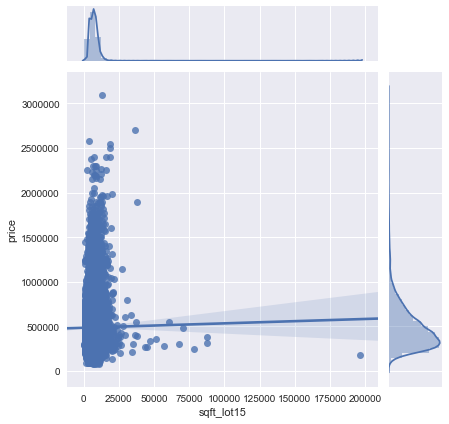

In [16]:
#Once more
sns.jointplot('sqft_lot15','price', data=df_filtered, kind='reg');

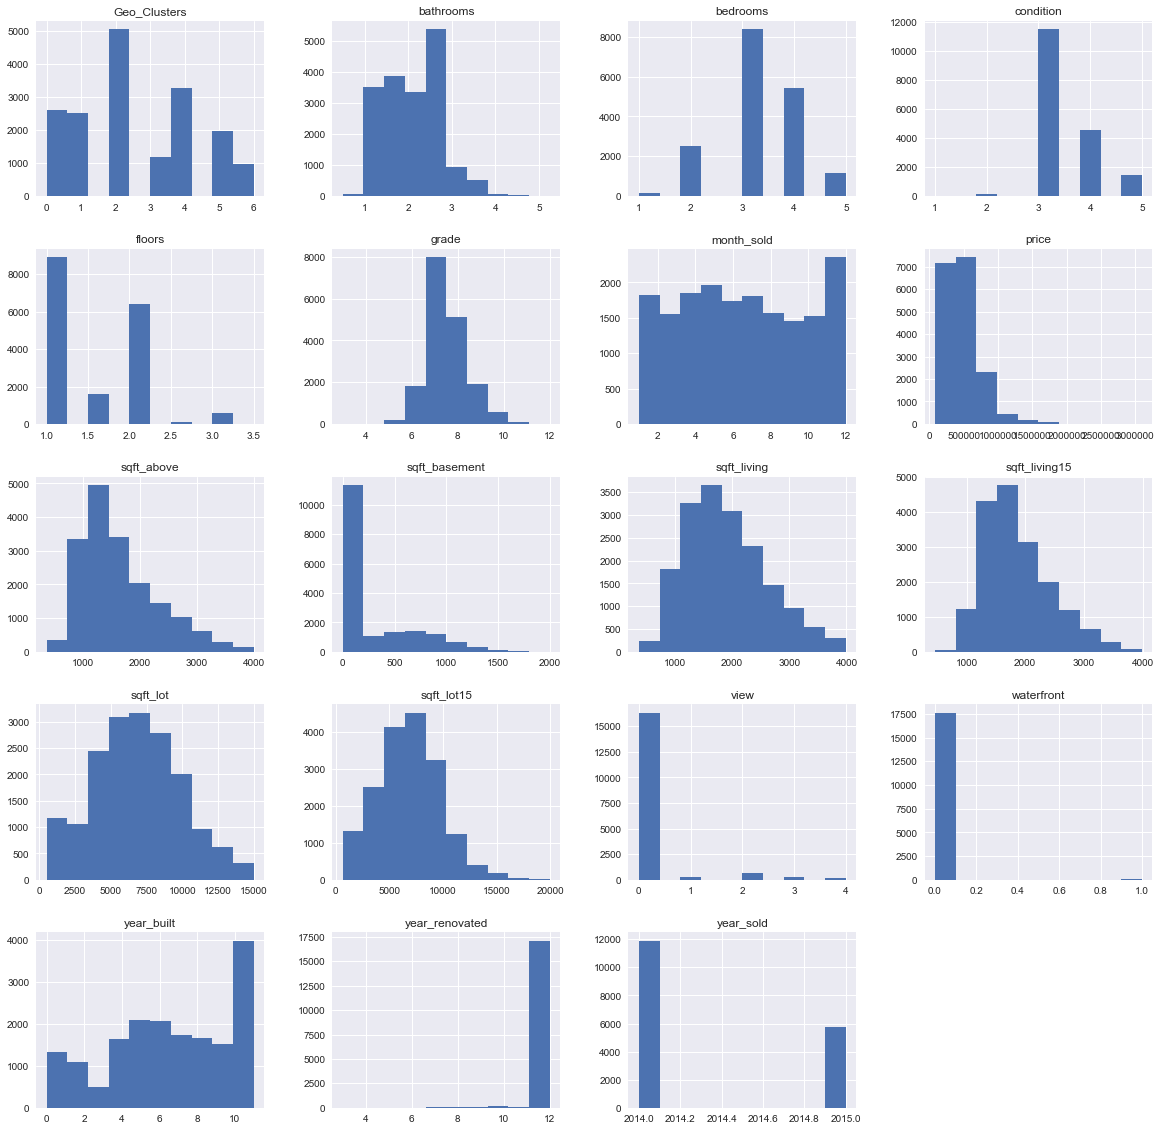

In [17]:
df_filtered = df[(df['sqft_living']<4000) & (df['bedrooms']<6) & (df['bathrooms']<6) & (df['sqft_lot'] <15000) &
                (df['sqft_lot15']<20000) & (df['sqft_living15']<4000)]
df_filtered.hist(figsize=[20,20]);

#### Feature selection of categorical data ####

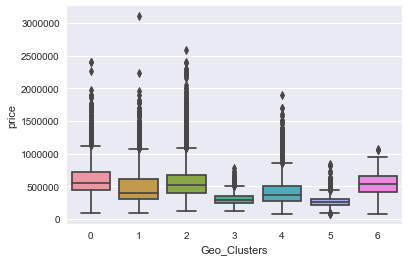

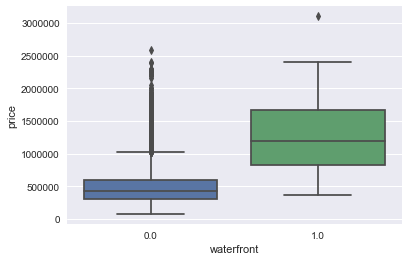

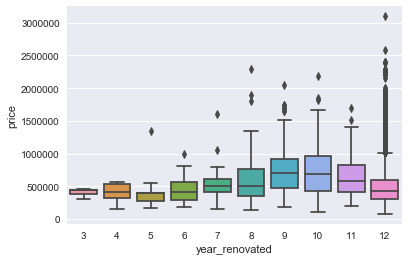

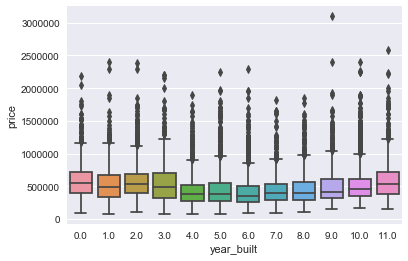

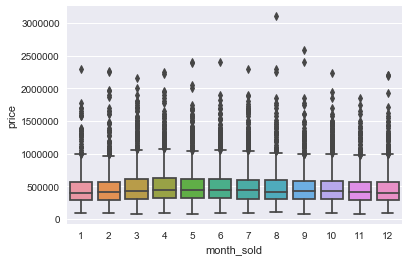

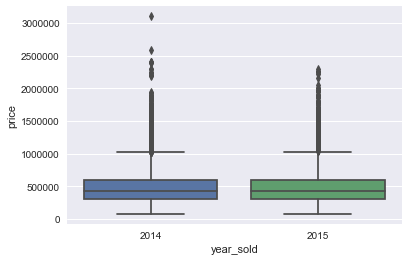

In [18]:
categoricals = ['Geo_Clusters','waterfront','year_renovated','year_built','month_sold','year_sold']



for i,feat in enumerate(categoricals):
        plt.figure(i)
        sns.boxplot(x=feat, y='price', data=df_filtered);

In [19]:
#looking thru the categorical data, some features don't seem to matter
#year_sold seems to be the least important - we'll drop it.
#geo_clusters seems to have quite a lot of variability as well
df_filtered = df_filtered.drop(['year_sold'], axis=1)
df_filtered.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15,month_sold,year_built,year_renovated,Geo_Clusters
0,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,0.0,1340,5650,10,5.0,12,4
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1690,7639,12,5.0,9,2
2,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,2720,8062,2,3.0,12,2
3,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1360,5000,12,6.0,12,4
4,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1800,7503,2,8.0,12,0


#### Checking for multicollinearity ####

In [20]:
corr=df_filtered.corr().abs()
c = corr.unstack()
co = c.sort_values(kind='quicksort')
corr.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15,month_sold,year_built,year_renovated,Geo_Clusters
price,1.000000,0.276189,0.428498,0.606095,0.000808,0.250784,0.154134,0.333677,0.064506,0.619820,0.485383,0.267610,0.526436,0.004839,0.022486,0.006043,0.081546,0.292798
bedrooms,0.276189,1.000000,0.490272,0.619297,0.224287,0.161525,0.011057,0.045888,0.026328,0.346008,0.501203,0.262123,0.414958,0.201547,0.000935,0.182476,0.013687,0.068517
bathrooms,0.428498,0.490272,1.000000,0.708510,0.039020,0.522075,0.011101,0.111366,0.135955,0.616973,0.628519,0.209923,0.530777,0.040044,0.010256,0.538554,0.004215,0.071880
sqft_living,0.606095,0.619297,0.708510,1.000000,0.210031,0.343332,0.035457,0.198979,0.055139,0.697586,0.839794,0.376687,0.740978,0.190585,0.009374,0.325897,0.020932,0.113813
sqft_lot,0.000808,0.224287,0.039020,0.210031,1.000000,0.385850,0.045118,0.057740,0.139817,0.040048,0.166290,0.096505,0.253146,0.875812,0.007166,0.065930,0.003281,0.104491


In [21]:
co.loc[co >= .75]

sqft_above      sqft_living       0.839794
sqft_living     sqft_above        0.839794
sqft_lot15      sqft_lot          0.875812
sqft_lot        sqft_lot15        0.875812
price           price             1.000000
year_built      year_built        1.000000
bedrooms        bedrooms          1.000000
bathrooms       bathrooms         1.000000
sqft_living     sqft_living       1.000000
sqft_lot        sqft_lot          1.000000
floors          floors            1.000000
waterfront      waterfront        1.000000
year_renovated  year_renovated    1.000000
view            view              1.000000
grade           grade             1.000000
sqft_above      sqft_above        1.000000
sqft_basement   sqft_basement     1.000000
sqft_living15   sqft_living15     1.000000
sqft_lot15      sqft_lot15        1.000000
month_sold      month_sold        1.000000
condition       condition         1.000000
Geo_Clusters    Geo_Clusters      1.000000
dtype: float64

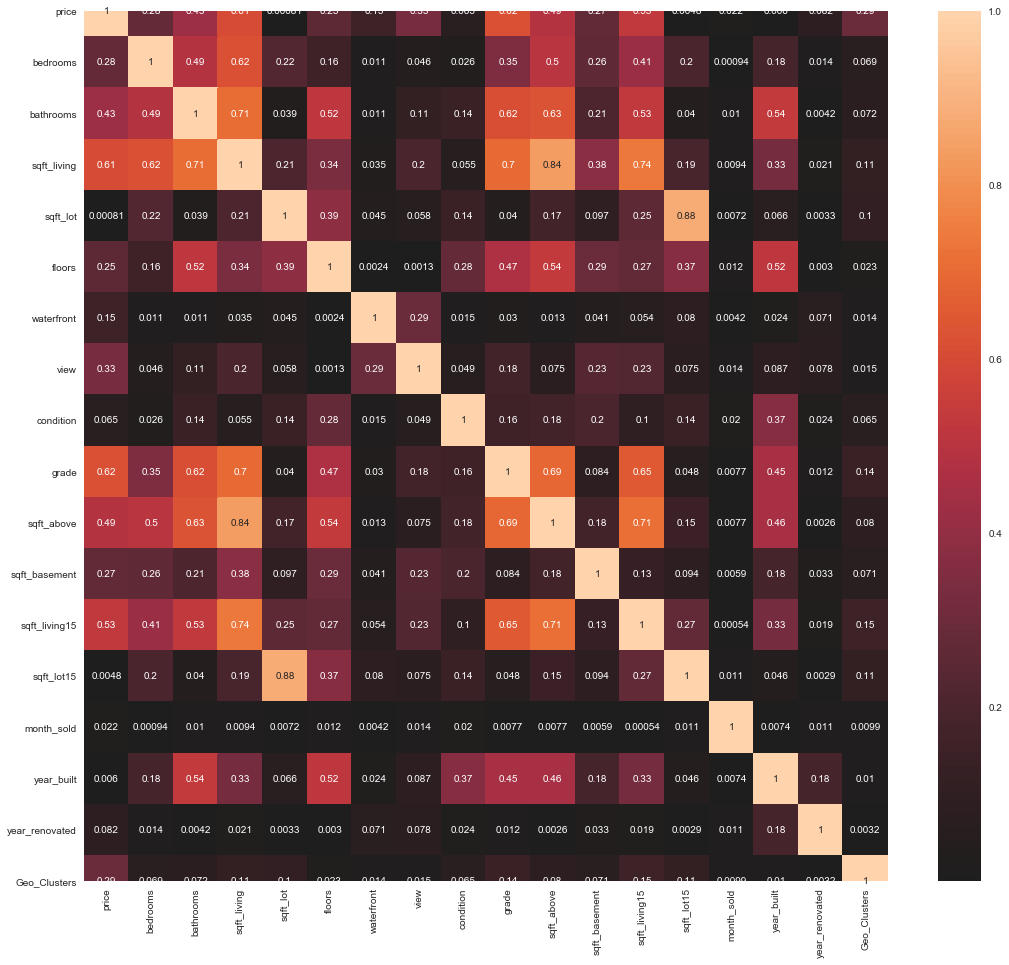

In [22]:
fig, ax = plt.subplots(figsize=(18,16))        
sns.heatmap(corr, center=0, annot=True, ax=ax)

In [23]:
print(df_filtered.columns)

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'sqft_living15', 'sqft_lot15', 'month_sold',
       'year_built', 'year_renovated', 'Geo_Clusters'],
      dtype='object')


Ames Housing DataSet - Regression Analysis and Diagnostics for SalePrice~bedrooms
-------------------------------------------------------------------------------------


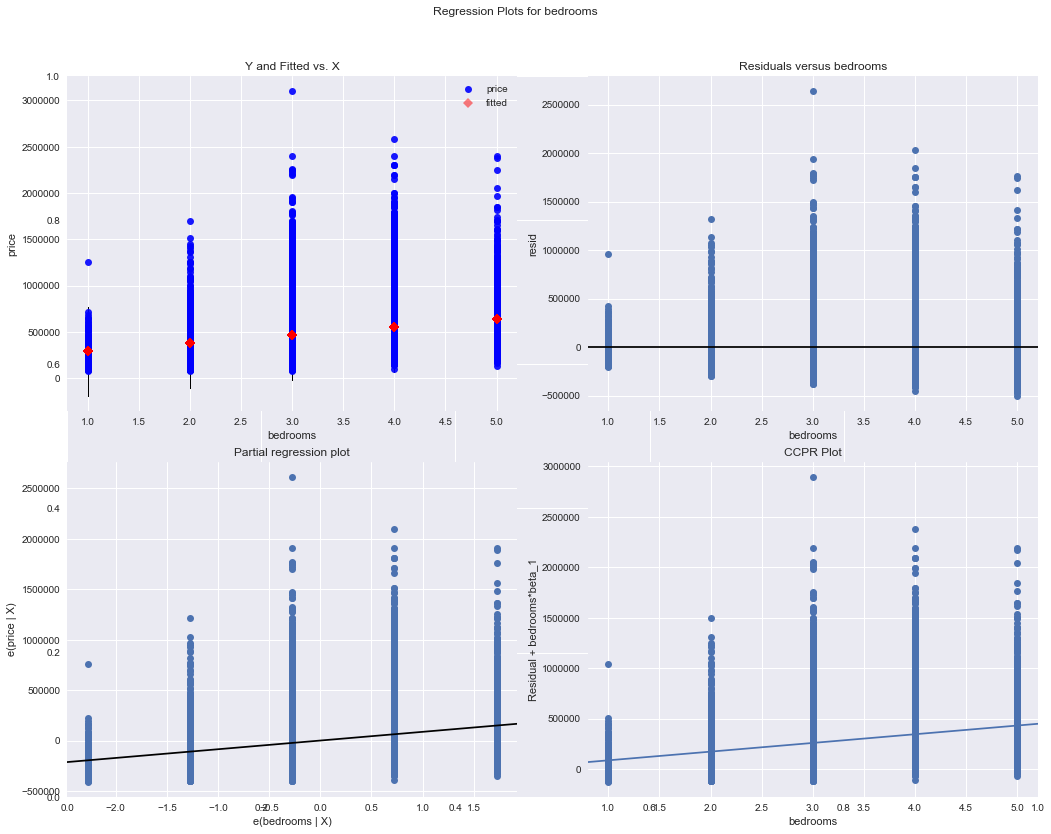

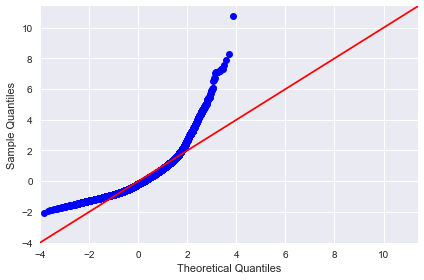

Ames Housing DataSet - Regression Analysis and Diagnostics for SalePrice~bathrooms
-------------------------------------------------------------------------------------


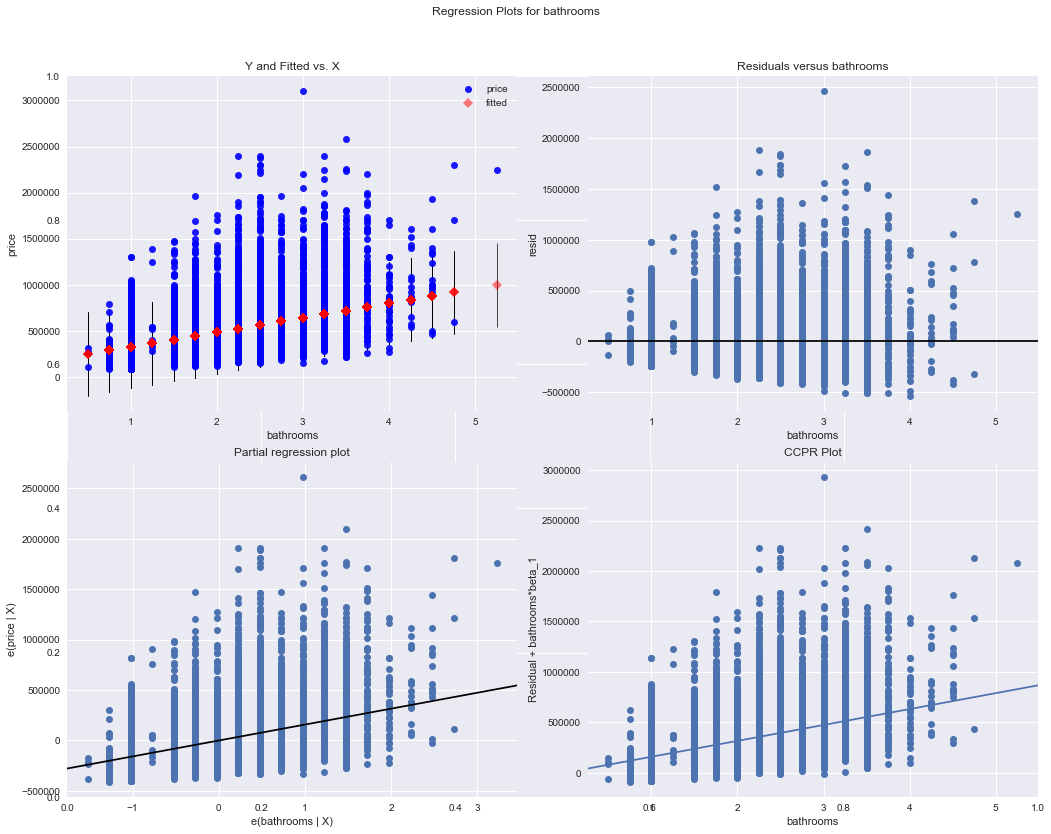

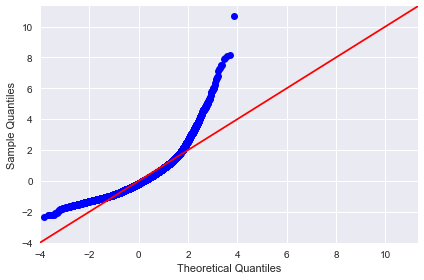

Ames Housing DataSet - Regression Analysis and Diagnostics for SalePrice~sqft_living
-------------------------------------------------------------------------------------


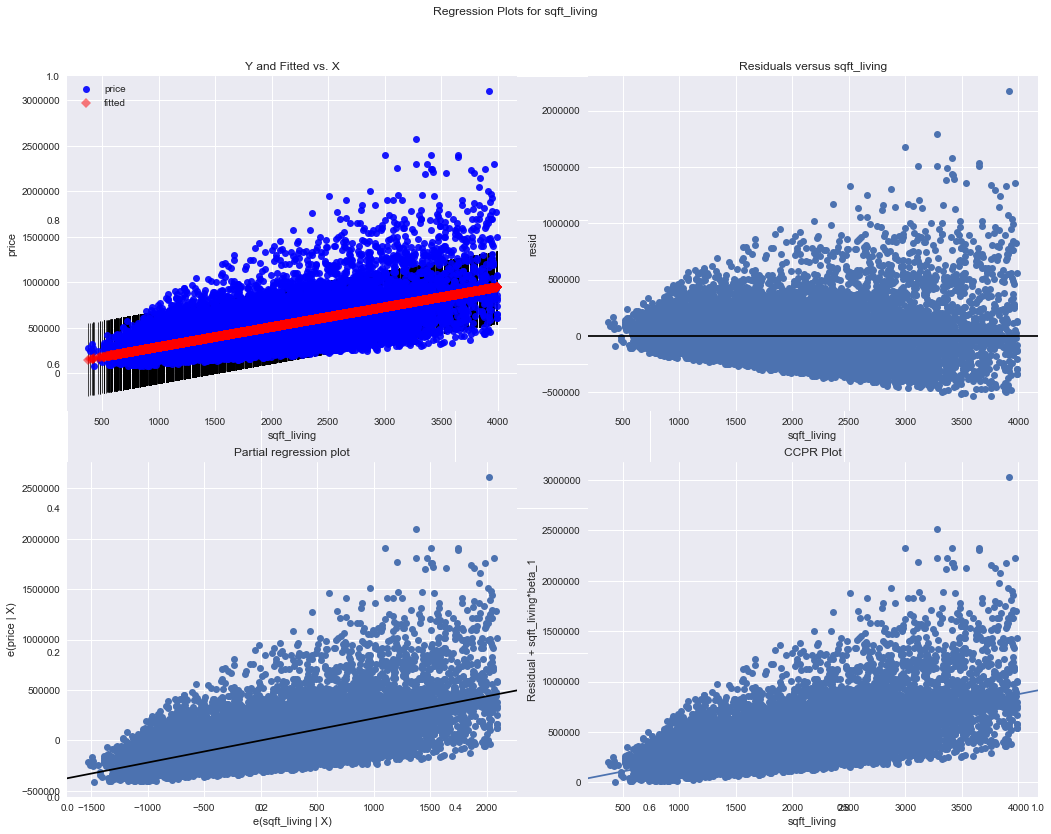

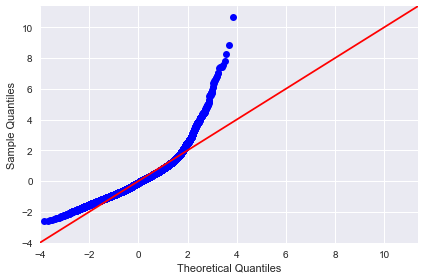

Ames Housing DataSet - Regression Analysis and Diagnostics for SalePrice~sqft_lot
-------------------------------------------------------------------------------------


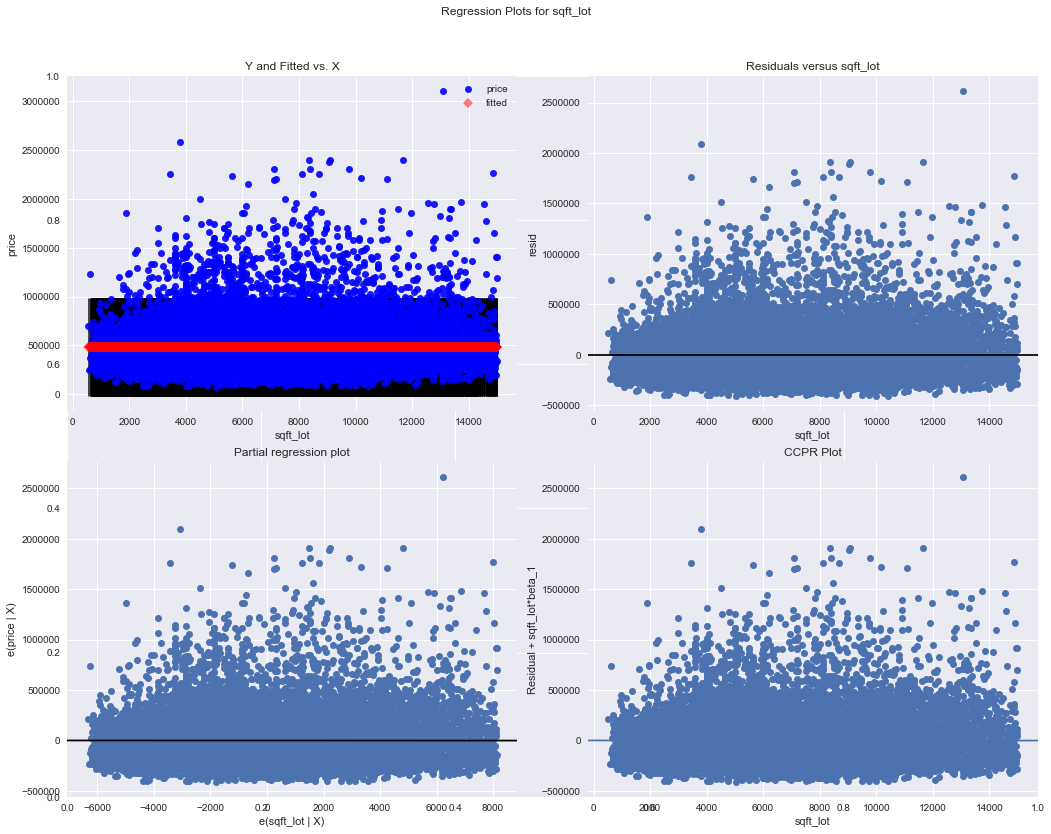

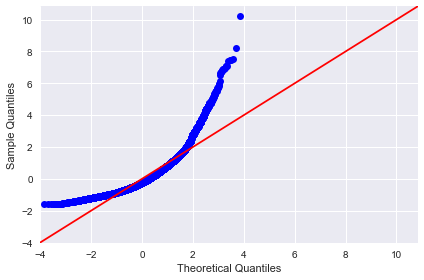

Ames Housing DataSet - Regression Analysis and Diagnostics for SalePrice~floors
-------------------------------------------------------------------------------------


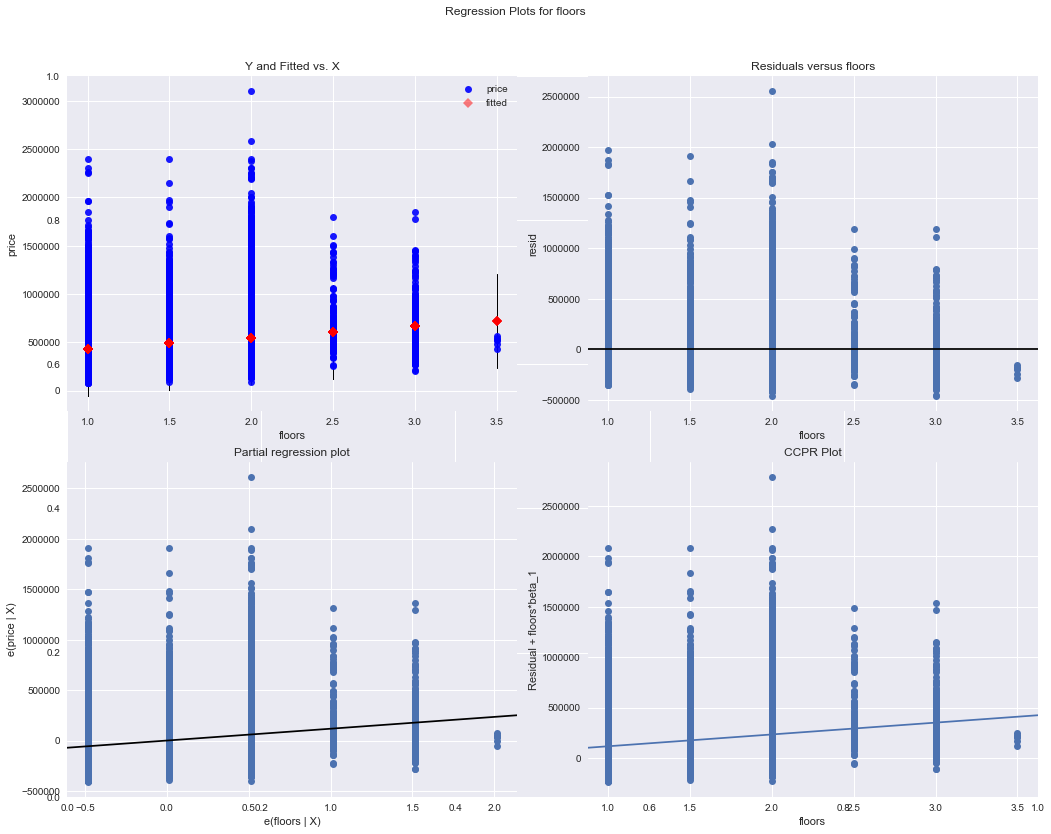

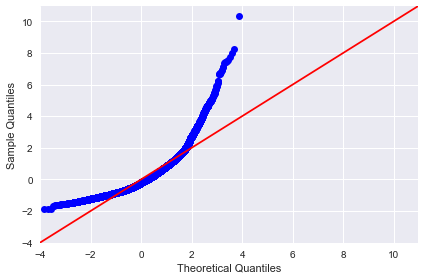

Ames Housing DataSet - Regression Analysis and Diagnostics for SalePrice~view
-------------------------------------------------------------------------------------


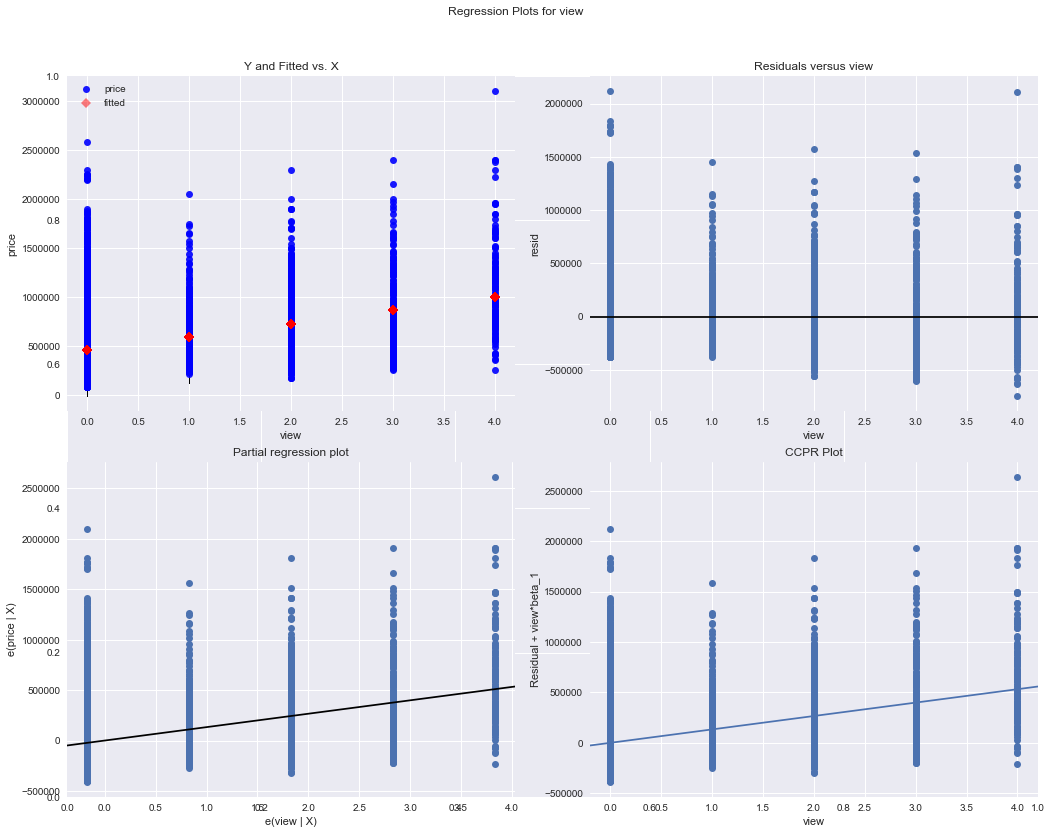

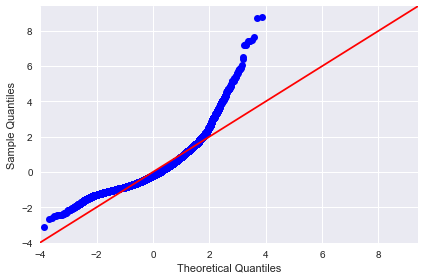

Ames Housing DataSet - Regression Analysis and Diagnostics for SalePrice~condition
-------------------------------------------------------------------------------------


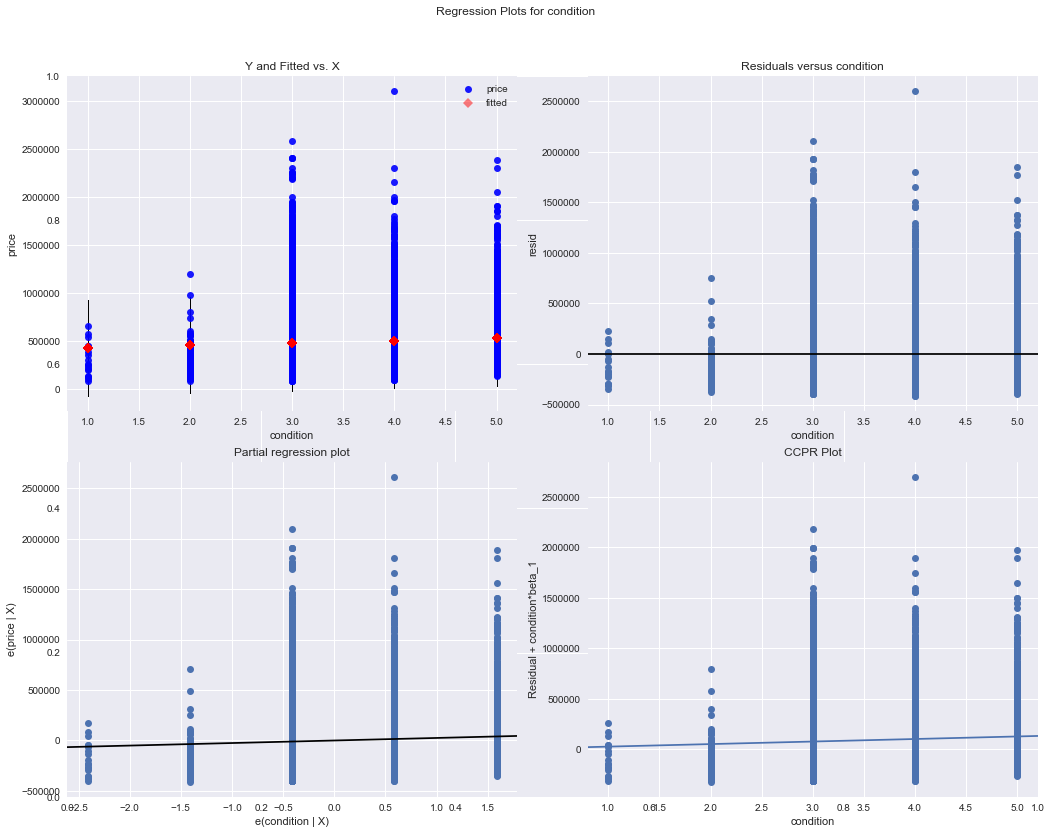

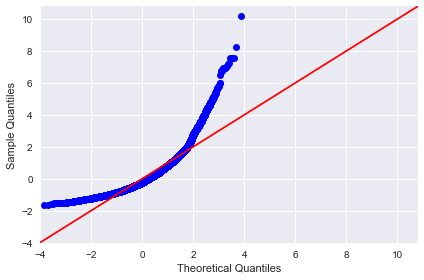

Ames Housing DataSet - Regression Analysis and Diagnostics for SalePrice~grade
-------------------------------------------------------------------------------------


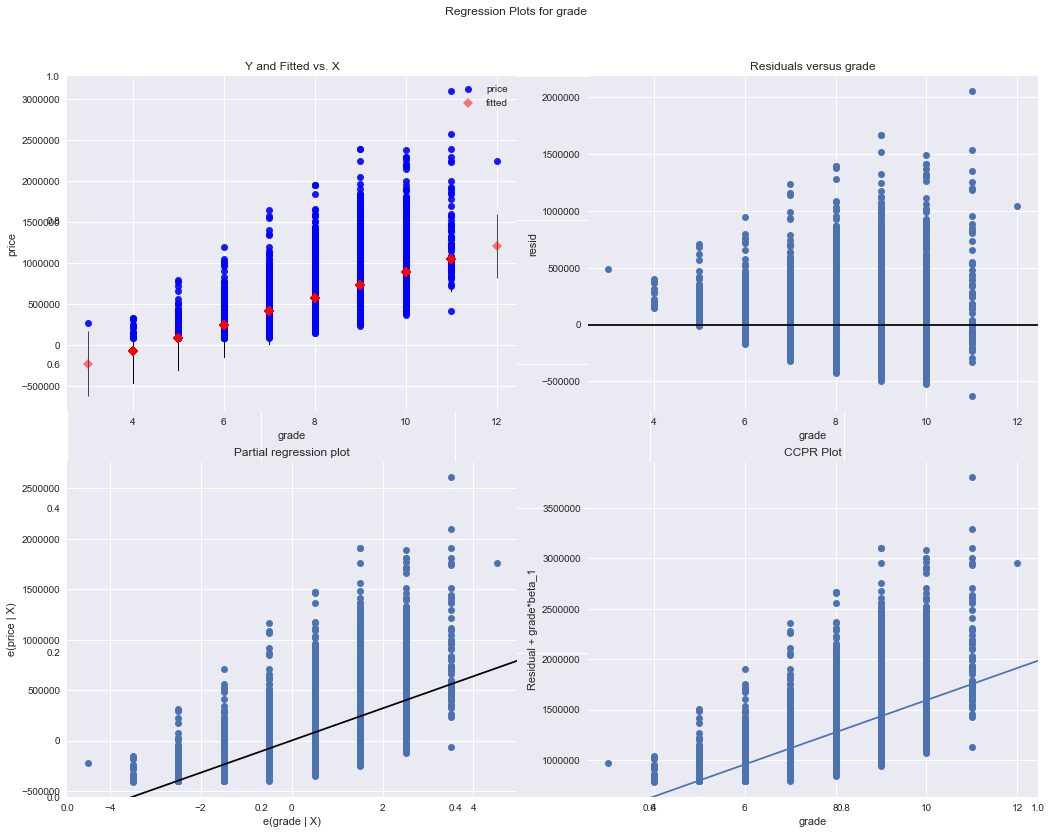

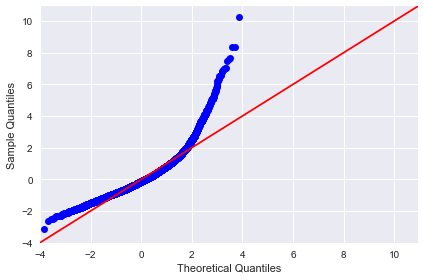

Ames Housing DataSet - Regression Analysis and Diagnostics for SalePrice~sqft_basement
-------------------------------------------------------------------------------------


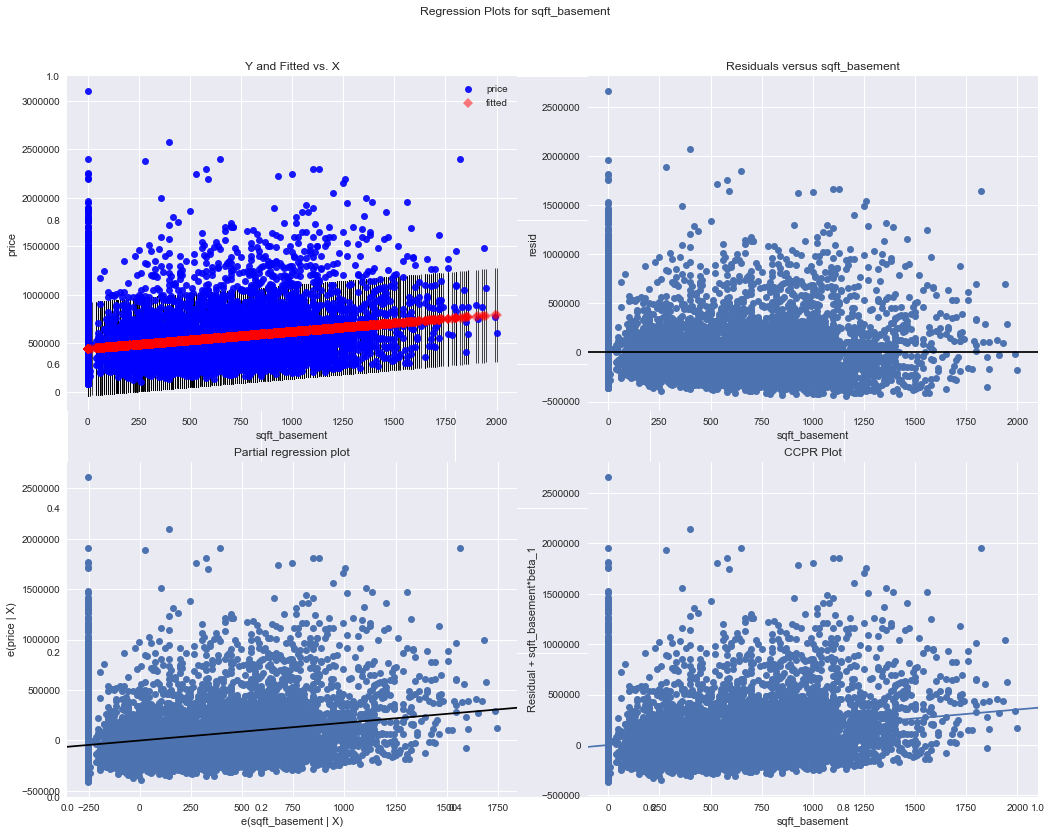

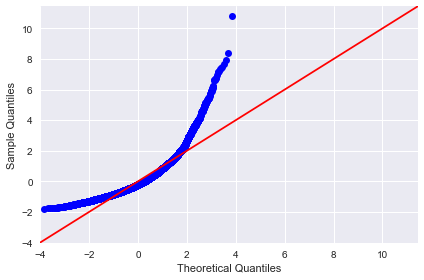

Ames Housing DataSet - Regression Analysis and Diagnostics for SalePrice~sqft_living15
-------------------------------------------------------------------------------------


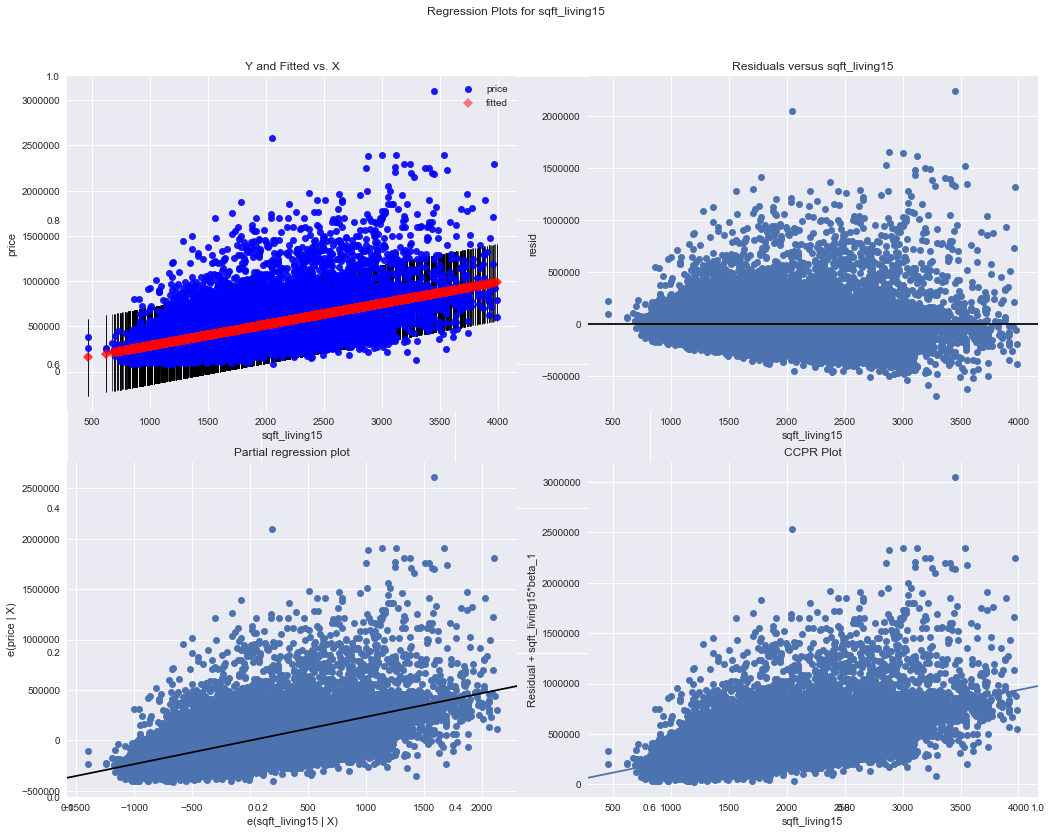

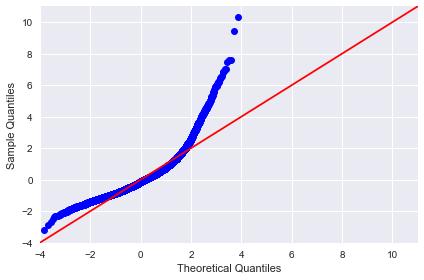

Ames Housing DataSet - Regression Analysis and Diagnostics for SalePrice~sqft_lot15
-------------------------------------------------------------------------------------


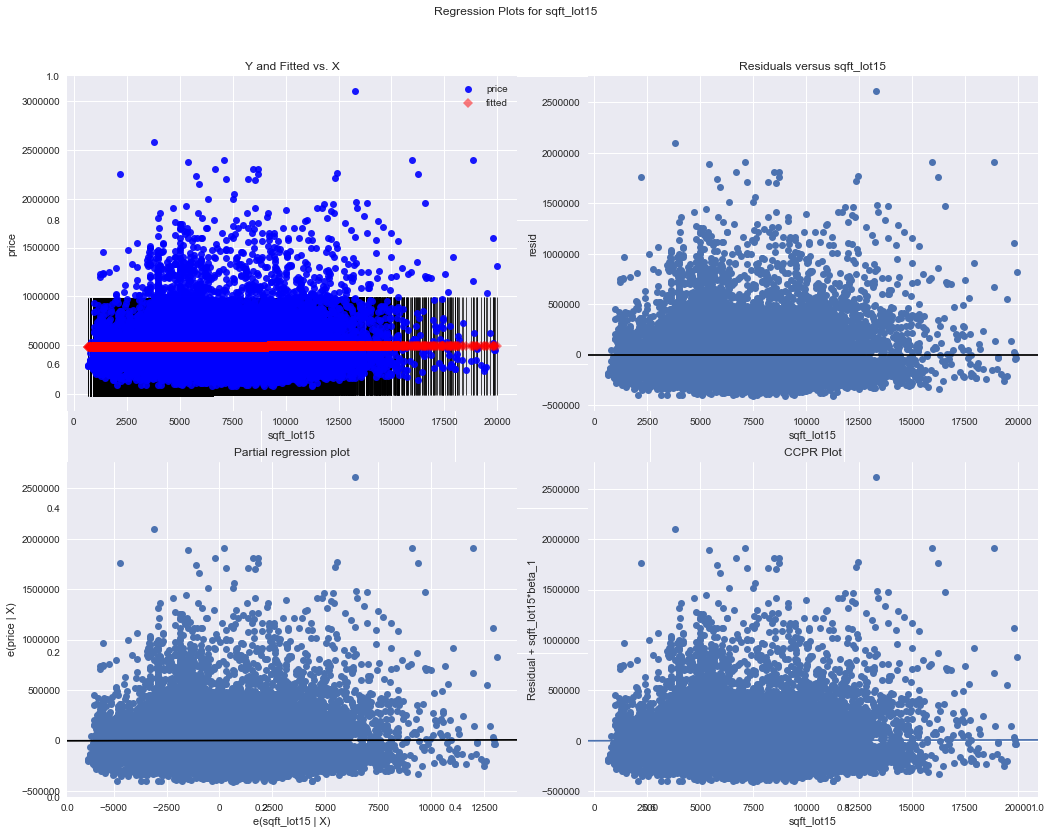

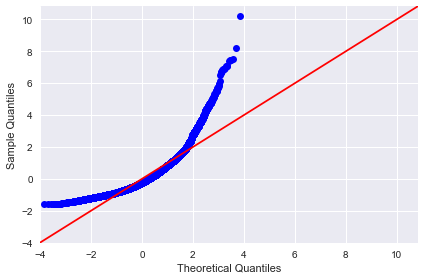

In [24]:
# import libraries
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats
import statsmodels.stats.api as sms


results = []
cont = ['bedrooms','bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'view',
       'condition','grade', 'sqft_basement','sqft_living15','sqft_lot15']
for idx, column in enumerate(df_filtered[cont]):
    print (f"Ames Housing DataSet - Regression Analysis and Diagnostics for SalePrice~{column}")
    print ("-------------------------------------------------------------------------------------")

    f = f'price~{column}'
    model = smf.ols(formula=f, data=df_filtered).fit()
    
    fig, axes = plt.subplots(figsize=(15,12))
    fig = sm.graphics.plot_regress_exog(model, column, fig=fig)
    fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)
    fig.tight_layout()
    plt.show()
    
    results.append([column, model.rsquared, model.params[0], model.params[1], model.pvalues[1], sms.jarque_bera(model.resid)[0]])


In [25]:
cont_results = pd.DataFrame(results, columns=['ind_var', 'r_squared', 'intercept', 
                                              'slope', 'p-value', 'normality (JB)' ])
cont_results

,ind_var,r_squared,intercept,slope,p-value,normality (JB)
0,bedrooms,7.628039e-02,204300.107603,86269.610393,1.985921e-306,47210.445087
1,bathrooms,1.836103e-01,167426.031554,157801.604000,0.000000e+00,41930.355381
2,sqft_living,3.673512e-01,70731.559628,218.961517,0.000000e+00,36599.342719
3,sqft_lot,6.535138e-07,487370.689095,-0.067739,9.144834e-01,44747.294199
4,floors,6.289263e-02,312929.481858,117163.477864,2.995015e-251,47022.188276
5,view,1.113407e-01,464327.920550,132904.560752,0.000000e+00,33386.907160
6,condition,4.161059e-03,400899.819166,25204.699541,9.677846e-18,44602.767352
7,grade,3.841766e-01,-706848.787338,159394.832557,0.000000e+00,36598.270703
8,sqft_basement,7.161508e-02,441890.496625,176.021567,4.126988e-287,45018.158303
9,sqft_living15,2.771352e-01,50536.016876,234.362897,0.000000e+00,43001.654980


In [26]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17648 entries, 0 to 21596
Data columns (total 18 columns):
price             17648 non-null float64
bedrooms          17648 non-null int64
bathrooms         17648 non-null float64
sqft_living       17648 non-null int64
sqft_lot          17648 non-null int64
floors            17648 non-null float64
waterfront        17648 non-null float64
view              17648 non-null float64
condition         17648 non-null int64
grade             17648 non-null int64
sqft_above        17648 non-null int64
sqft_basement     17648 non-null float64
sqft_living15     17648 non-null int64
sqft_lot15        17648 non-null int64
month_sold        17648 non-null int64
year_built        17571 non-null float64
year_renovated    17648 non-null int64
Geo_Clusters      17648 non-null int64
dtypes: float64(7), int64(11)
memory usage: 3.2 MB


#### One - Hot - Encoding ####

In [27]:
#switch the categorical data to string so it can be encoded 
categoricals = ['Geo_Clusters','year_renovated','waterfront','year_built','month_sold']

df_filtered[categoricals] = df_filtered[categoricals].astype(str)

In [28]:
df_filtered.info()
#Saving preprocessed data, ready for EDA 
df_filtered.head()
df_filtered.to_csv('./data/no-dummies.csv')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17648 entries, 0 to 21596
Data columns (total 18 columns):
price             17648 non-null float64
bedrooms          17648 non-null int64
bathrooms         17648 non-null float64
sqft_living       17648 non-null int64
sqft_lot          17648 non-null int64
floors            17648 non-null float64
waterfront        17648 non-null object
view              17648 non-null float64
condition         17648 non-null int64
grade             17648 non-null int64
sqft_above        17648 non-null int64
sqft_basement     17648 non-null float64
sqft_living15     17648 non-null int64
sqft_lot15        17648 non-null int64
month_sold        17648 non-null object
year_built        17648 non-null object
year_renovated    17648 non-null object
Geo_Clusters      17648 non-null object
dtypes: float64(5), int64(8), object(5)
memory usage: 3.2+ MB


In [29]:
#get the dummie values and create a new dataframe w/ cont and cate dummy data 
dummies = pd.get_dummies(df_filtered[categoricals], prefix=categoricals, drop_first=True)

df_model = df_filtered.drop(categoricals, axis=1)

df_model = pd.concat([df_model, dummies], axis=1)

df_model.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,...,month_sold_11,month_sold_12,month_sold_2,month_sold_3,month_sold_4,month_sold_5,month_sold_6,month_sold_7,month_sold_8,month_sold_9
0,221900.0,3,1.00,1180,5650,1.0,0.0,3,7,1180,...,0,0,0,0,0,0,0,0,0,0
1,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,2170,...,0,1,0,0,0,0,0,0,0,0
2,180000.0,2,1.00,770,10000,1.0,0.0,3,6,770,...,0,0,1,0,0,0,0,0,0,0
3,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1050,...,0,1,0,0,0,0,0,0,0,0
4,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1680,...,0,0,1,0,0,0,0,0,0,0


In [30]:
df_model.columns
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17648 entries, 0 to 21596
Data columns (total 52 columns):
price                17648 non-null float64
bedrooms             17648 non-null int64
bathrooms            17648 non-null float64
sqft_living          17648 non-null int64
sqft_lot             17648 non-null int64
floors               17648 non-null float64
view                 17648 non-null float64
condition            17648 non-null int64
grade                17648 non-null int64
sqft_above           17648 non-null int64
sqft_basement        17648 non-null float64
sqft_living15        17648 non-null int64
sqft_lot15           17648 non-null int64
Geo_Clusters_1       17648 non-null uint8
Geo_Clusters_2       17648 non-null uint8
Geo_Clusters_3       17648 non-null uint8
Geo_Clusters_4       17648 non-null uint8
Geo_Clusters_5       17648 non-null uint8
Geo_Clusters_6       17648 non-null uint8
year_renovated_11    17648 non-null uint8
year_renovated_12    17648 non-null uint8

In [31]:
df_model=df_model.rename(columns={'waterfront_1.0':'waterfront_1'})
df_model['waterfront_1'].value_counts()

0    17605
1       43
Name: waterfront_1, dtype: int64

In [32]:
df_model=df_model.rename(columns={'year_built_1.0':'year_built_1','year_built_2.0':'year_built_2',
                         'year_built_3.0':'year_built_3','year_built_4.0':'year_built_4',
                        'year_built_5.0':'year_built_5','year_built_6.0':'year_built_6',
                        'year_built_7.0':'year_built_7','year_built_8.0':'year_built_8',
                        'year_built_9.0':'year_built_9','year_built_10.0':'year_built_10',
                                  'year_built_11.0':'year_built_11'})


In [33]:
df_model.columns
len(df_model)

17648

In [34]:
#Saving preprocessed data, ready for EDA 
df_model.to_csv('./data/EDA.csv')